In [11]:
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [5]:
A = rand(100,100)
B = rand(100,100)
naive_multiplication(A,B)


100×100 Array{Float64,2}:
 22.2126  23.0592  21.6017  22.6805  …  24.0286  23.2137  22.7068  23.7841
 27.1984  26.6022  26.0268  26.5004     27.2064  26.4076  27.4973  25.3772
 26.3071  28.4721  26.3587  27.9916     27.2356  26.3555  27.9513  28.8001
 23.3233  24.062   22.0977  24.1673     25.6212  23.8007  24.1344  25.4055
 23.4488  24.582   20.7337  23.3328     24.1361  22.2058  22.8464  23.4986
 26.9451  26.2361  27.6517  25.6834  …  26.6855  27.3292  25.7262  27.6857
 26.1816  26.5632  26.1995  24.0833     27.3528  25.9124  25.3881  25.8678
 24.0126  24.8693  24.676   24.1797     24.0439  24.2222  25.0294  24.3689
 23.2183  24.5965  20.6894  25.298      24.9795  25.8656  23.3969  26.0429
 22.2507  23.1854  23.6049  23.8788     24.4064  22.2245  21.8166  24.1765
 23.0771  23.5756  23.7667  24.7874  …  24.8816  23.2132  22.9022  24.1058
 26.9386  26.6215  26.1201  26.7652     28.0623  27.5541  26.9803  28.9071
 24.6293  25.7938  24.8721  25.7737     28.3562  24.8061  25.1148  24.7405

In [4]:
better_multiplication(A,B)

100×100 Array{Float64,2}:
 21.9118  23.891   24.1136  24.2826  …  24.7404  25.6488  25.4171  22.6637
 22.4648  25.6451  25.5163  24.6876     23.721   25.4557  25.6666  21.1933
 23.3948  28.645   26.7152  26.0016     25.9778  27.6688  28.8785  23.5362
 23.5255  26.6557  26.5464  26.8957     25.1462  25.4776  27.7777  24.3243
 20.1168  25.5746  24.5293  24.6539     23.3213  24.3667  25.8764  22.1317
 19.5754  23.2683  23.1461  22.1222  …  22.7915  23.6923  23.2251  20.1651
 17.3962  22.9363  21.0105  20.9302     21.0794  23.071   20.896   19.1107
 22.6716  25.4188  26.5654  24.3159     25.3381  24.6299  28.3911  21.3505
 24.6706  29.8725  28.1555  27.955      26.0516  29.3258  30.7516  25.5336
 20.2696  25.2899  23.361   22.3251     23.7008  24.6859  25.1839  21.256 
 19.6687  23.5341  22.9946  22.9745  …  22.8425  22.7987  24.7442  20.6654
 20.9914  24.1363  23.6018  22.3243     22.8835  24.2157  23.8531  21.2442
 20.6163  25.0717  23.9895  23.8157     22.6849  25.5833  24.4734  21.0548

In [9]:
time_G = Float64[]
time_N = Float64[]
time_M = Float64[]
sizei = Int32[]

for i=100:50:700
        for j=0:10
        push!(sizei,i)
        A_matrix = rand(i,i)
        B_matrix = rand(i,i)
        C = @elapsed A_matrix*B_matrix
        push!(time_G,C)
        E = @elapsed naive_multiplication(A_matrix,B_matrix)
        push!(time_N,E)
        D = @elapsed better_multiplication(A_matrix,B_matrix)
        push!(time_M,D)
    end
end

In [12]:
using DataFrames
using Statistics


df1=DataFrame(Size=sizei,Naive=time_N,Better=time_M,BLAS=time_G)
df2=by(df1,:Size,AVG_N = :Naive => mean,STD_N = :Naive => std , AVG_B = :Better => mean,STD_B = :Better => std , AVG_G = :BLAS => mean , STD_G = :BLAS => std)

,Size,AVG_N,STD_N,AVG_B,STD_B,AVG_G,STD_G
,Int32,Float64,Float64,Float64,Float64,Float64,Float64
1,100,0.00359885,0.000234226,0.00190571,0.00034475,0.00394157,0.0102734
2,150,0.0309876,0.0325467,0.0197974,0.0299648,0.0208795,0.0352021
3,200,0.100108,0.00345903,0.0404968,0.0359526,0.0143975,0.0312013
4,250,0.166697,0.0136435,0.026695,0.00168363,0.00707176,0.0217339
5,300,0.191987,0.028591,0.0483537,0.00862044,0.00080176,0.000117359
6,350,0.225063,0.0048246,0.0720808,0.00227825,0.00133783,0.000449835
7,400,0.30904,0.0224177,0.106152,0.00431686,0.00170829,0.000813648
8,450,0.437833,0.0186777,0.151437,0.00317085,0.0020194,0.000529798
9,500,0.530532,0.0260512,0.207918,0.00581178,0.00253515,0.000718209


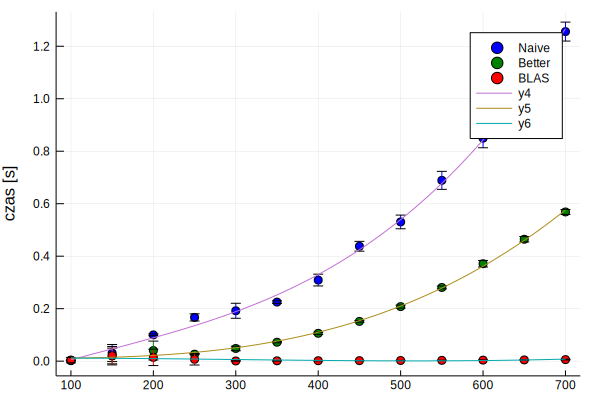

In [18]:
using Plots
using Polynomials

scatter(df2[:Size],[df2[:AVG_N],df2[:AVG_B],df2[:AVG_G]],colour = [:blue :green :red],label=["Naive" "Better" "BLAS"],ylabel="czas [s]",yerr=[df2[:STD_N] df2[:STD_B] df2[:STD_G]])
fitNaive=polyfit(df2[:Size],df2[:AVG_N],3)
fitBetter=polyfit(df2[:Size],df2[:AVG_B],3)
fitBLAS=polyfit(df2[:Size],df2[:AVG_G],3)
xd=100:10:700
plot!(xd, polyval(fitNaive, xd))
plot!(xd, polyval(fitBetter,xd))
plot!(xd,polyval(fitBLAS,xd))

In [14]:
fitNaive

Poly(-0.09007171616746748 + 0.0010911820788624133*x - 1.8527981362092153e-6*x^2 + 4.3762620701419585e-9*x^3)

In [15]:
fitBetter

Poly(0.00911848199001026 + 1.941509185488541e-5*x - 1.4567192885296005e-7*x^2 + 1.8213788915024336e-9*x^3)

In [16]:
fitBLAS

Poly(0.011042587919898168 + 2.5499572066873813e-5*x - 2.1077170861865783e-7*x^2 + 2.399152807798294e-10*x^3)